In [1]:
import json

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import escreve_xlsx as es

In [4]:
# path = "C:\\saida_teste\\relatorio_json_atualizado.xlsx"
path = "C:\\saida_teste\\dados_reais_2kamostras.xlsx"

with open(path + ".txt", 'r') as file:
    text = file.read()
    
text = text.replace("\'", "\"")
text = text.replace("nan", "\"nan\"")
data = json.loads(text)
# data

In [5]:
def get_descritor_catalogo(data, categoria, descritor, r_medido, r_max):
    def cr_f_categoria(categoria):
        def filter_categoria(element):
            return element['categoria'] == categoria
        return filter_categoria
    
    def map_element(element):
        return lambda x: x[element]
#     def c_map(element):
#         return element['list_kappa_cat']
#     def c_map_2(element):
#         return element
    strin = ""
    if(r_max):
        strin = "list_kappa_cat_max"
    else:
        strin = "list_kappa_cat"

    saida = []
    if (r_medido):
        saida.append(list(filter(cr_f_categoria(categoria), data['medido'][strin]))[0])
        
    else:
        for item in data['varios_kappa']:
            saida.append(list(filter(cr_f_categoria(categoria), item[strin]))[0]) 
        
    
#     print(saida)
    saida = list(map(map_element(descritor), saida))
    
    return saida





In [6]:
# def get_lis_categoria_categoria(categoria, descritor, r_medido, r_max):
#     def cr_f_categoria(categoria):
#         def filter_categoria(element):
#             return element['categoria'] == categoria
#         return filter_categoria
    
#     def map_element(element):
#         return lambda x: x[element]
# #     def c_map(element):
# #         return element['list_kappa_cat']
# #     def c_map_2(element):
# #         return element
#     strin = ""
#     if(r_max):
#         strin = "catalogo_var_max"
#     else:
#         strin = "catalogo_var"

#     saida = []
#     if (r_medido):
#         saida.append(list(filter(cr_f_categoria(categoria), data['medido'][strin]))[0])
        
#     else:
#         for item in data['varios_kappa']:
#             saida.append(list(filter(cr_f_categoria(categoria), item[strin]))[0]) 
        
    
#     print(saida)
#     saida = list(map(map_element(descritor), saida))
    
#     return saida

In [7]:
# data
# get_lis_categoria_categoria("Swimming", 'kappa', False, True)
data['varios_kappa'][2]['catalogo_var_max']

{'categoria': 'Catalog',
 'observada': 0.994606,
 'acaso': 0.327215,
 'vies': 0.0052589,
 'kappa': 0.991983,
 'prevalencia': 0.735032,
 'matriz_concordancia': [[710, 8, 12, 2, 0, 6, 0],
  [0, 2818, 0, 0, 0, 0, 0],
  [0, 0, 654, 0, 0, 0, 0],
  [0, 0, 0, 130, 0, 0, 0],
  [0, 12, 0, 0, 54, 0, 0],
  [0, 0, 0, 0, 0, 3000, 0],
  [0, 0, 0, 0, 0, 0, 10]]}

In [8]:
data['varios_kappa'][0]['catalogo_var']

{'categoria': 'Catalog',
 'observada': 0.844705,
 'acaso': 0.326497,
 'vies': 0.133629,
 'kappa': 0.769421,
 'prevalencia': 0.64823,
 'matriz_concordancia': [[443, 236, 12, 0, 8, 40, 0],
  [213, 2410, 32, 4, 29, 128, 4],
  [13, 37, 534, 4, 4, 64, 0],
  [0, 1, 5, 116, 0, 11, 0],
  [6, 38, 5, 0, 11, 8, 0],
  [38, 114, 81, 9, 5, 2756, 0],
  [0, 5, 0, 0, 0, 0, 7]]}

In [9]:
get_descritor_catalogo(data, "Diving", 'kappa', False, True)

[0.47196,
 0.47196,
 0.47196,
 0.47196,
 0.47196,
 0.506223,
 0.506223,
 0.506223,
 0.506223,
 0.506223,
 0.507701,
 0.507701,
 0.507701,
 0.507701,
 0.507701,
 0.481314,
 0.481314,
 0.481314,
 0.481314,
 0.481314,
 0.458777,
 0.458777,
 0.458777,
 0.458777,
 0.458777,
 0.473837,
 0.473837,
 0.473837,
 0.473837,
 0.473837,
 0.495075,
 0.495075,
 0.495075,
 0.495075,
 0.495075,
 0.532623,
 0.532623,
 0.532623,
 0.532623,
 0.532623,
 0.472652,
 0.472652,
 0.472652,
 0.472652,
 0.472652,
 0.47616,
 0.47616,
 0.47616,
 0.47616,
 0.47616,
 0.419211,
 0.419211,
 0.419211,
 0.419211,
 0.419211,
 0.519866,
 0.519866,
 0.519866,
 0.519866,
 0.519866,
 0.486114,
 0.486114,
 0.486114,
 0.486114,
 0.486114,
 0.467223,
 0.467223,
 0.467223,
 0.467223,
 0.467223,
 0.456129,
 0.456129,
 0.456129,
 0.456129,
 0.456129,
 0.424598,
 0.424598,
 0.424598,
 0.424598,
 0.424598,
 0.470166,
 0.470166,
 0.470166,
 0.470166,
 0.470166,
 0.490086,
 0.490086,
 0.490086,
 0.490086,
 0.490086,
 0.488725,
 0.488725

In [10]:
# data['çs']

In [11]:
# # pega os dados medidos
# get_lis_categoria('Swimming','kappa', True, True)
# # pega os dados bootstrap
# get_lis_categoria('Swimming', 'kappa', False, True)

In [12]:

amax = get_descritor_catalogo(data, 'Swimming', 'kappa', False, True)

ames = get_descritor_catalogo(data, 'Swimming', 'kappa', False, False)

ames, amax

([0.563945,
  0.563945,
  0.563945,
  0.563945,
  0.563945,
  0.542603,
  0.542603,
  0.542603,
  0.542603,
  0.542603,
  0.516267,
  0.516267,
  0.516267,
  0.516267,
  0.516267,
  0.551094,
  0.551094,
  0.551094,
  0.551094,
  0.551094,
  0.530519,
  0.530519,
  0.530519,
  0.530519,
  0.530519,
  0.554615,
  0.554615,
  0.554615,
  0.554615,
  0.554615,
  0.558412,
  0.558412,
  0.558412,
  0.558412,
  0.558412,
  0.569143,
  0.569143,
  0.569143,
  0.569143,
  0.569143,
  0.51419,
  0.51419,
  0.51419,
  0.51419,
  0.51419,
  0.551356,
  0.551356,
  0.551356,
  0.551356,
  0.551356,
  0.558623,
  0.558623,
  0.558623,
  0.558623,
  0.558623,
  0.513313,
  0.513313,
  0.513313,
  0.513313,
  0.513313,
  0.519767,
  0.519767,
  0.519767,
  0.519767,
  0.519767,
  0.52639,
  0.52639,
  0.52639,
  0.52639,
  0.52639,
  0.532667,
  0.532667,
  0.532667,
  0.532667,
  0.532667,
  0.523148,
  0.523148,
  0.523148,
  0.523148,
  0.523148,
  0.524035,
  0.524035,
  0.524035,
  0.524035,
  

In [13]:
data['medido']["catalogo_var_max"]['kappa']

0.971533

In [14]:
data['medido']['catalogo_var']

{'categoria': 'Catalog',
 'observada': 0.849145,
 'acaso': 0.32738,
 'vies': 0.133899,
 'kappa': 0.775721,
 'prevalencia': 0.652133,
 'matriz_concordancia': [[411, 271, 16, 0, 6, 53, 0],
  [176, 2393, 52, 0, 45, 140, 7],
  [6, 6, 572, 4, 0, 67, 0],
  [0, 2, 7, 118, 0, 0, 0],
  [5, 24, 6, 0, 10, 2, 0],
  [38, 95, 66, 15, 12, 2798, 0],
  [0, 0, 0, 0, 0, 0, 8]]}

In [15]:
dt =     es.get_descritores_max(False, data)
dt_max = es.get_descritores_max(True, data)

dt

{'categoria': ['Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',

In [16]:
len(dt['observada'])

1667

In [17]:
plt.rcParams["figure.figsize"] = (10,5)

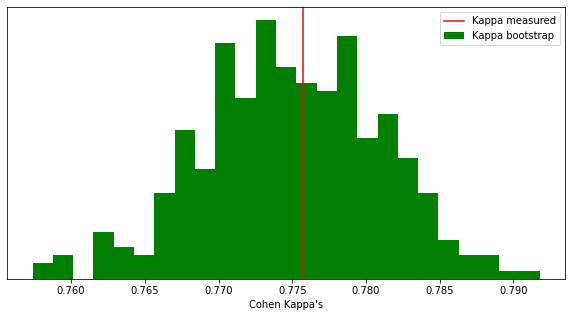

In [18]:
# x = dt['kappa']
plt.tick_params(left = False, labelleft = False)
num_bins = 2

H1 = dt['kappa']
S1 = dt_max['kappa']

# plt.hist([H1,S1], bins=25, range=(0.4,1), align=('mid'), color=['green', 'orange'], label=['Kappa bootstrap', 'Kappa max bootstrap'])

plt.hist([H1], bins=25, align=('mid'), color=['green'], label=['Kappa bootstrap'])

# n, bins, patches = plt.hist(dt['kappa'], num_bins, facecolor='blue', alpha=0.5, label="Bootstrap ")

# n, bins, patches = plt.hist(dt_max['kappa'], num_bins, facecolor='red', alpha=0.5 label="Bootstrap max")

plt.axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
# plt.axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")
plt.xlabel("Cohen Kappa's")
# Function add a legend  
plt.legend()
plt.show()

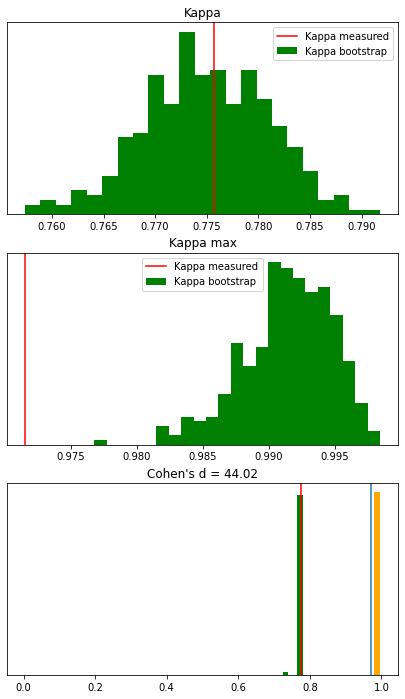

In [19]:
fig, axs = plt.subplots(3)
fig.set_size_inches(7, 12)
axs[0].tick_params(left = False, labelleft = False)
axs[1].tick_params(left = False, labelleft = False)
axs[2].tick_params(left = False, labelleft = False)
num_bins = 23

H1 = dt['kappa']
S1 = dt_max['kappa']

axs[0].hist([H1], bins=num_bins, align=('mid'), color=['green'], label=['Kappa bootstrap'])
axs[1].hist([S1], bins=num_bins, align=('mid'), color=['green'], label=['Kappa bootstrap'])
axs[2].hist([H1,S1], bins=25, range=(0,1), align=('mid'), color=['green', 'orange'], label=['Kappa bootstrap', 'Kappa max bootstrap'])

# n, bins, patches = plt.hist(dt['kappa'], num_bins, facecolor='blue', alpha=0.5, label="Bootstrap ")

# n, bins, patches = plt.hist(dt_max['kappa'], num_bins, facecolor='red', alpha=0.5 label="Bootstrap max")

axs[0].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
axs[1].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa measured", color='red')

axs[2].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
axs[2].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")
# plt.axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")
# axs[0].xlabel("Cohen Kappa's")
# Function add a legend  

axs[0].set_title("Kappa")
axs[1].set_title("Kappa max")


d = es.get_d_cohen(H1, S1)
axs[2].set_title("Cohen's d = {:.2f}".format(d))



# text = axs[2].text(1, 1, "d = {:.2f}".format(d))
# text.set_position((0, 5))




axs[0].legend()
axs[1].legend()
plt.show()

In [20]:
data['medido']["catalogo_var_max"]['kappa']

0.971533

In [21]:
dt_max['kappa']

[0.991983,
 0.991983,
 0.991983,
 0.991983,
 0.991983,
 0.990753,
 0.990753,
 0.990753,
 0.990753,
 0.990753,
 0.99359,
 0.99359,
 0.99359,
 0.99359,
 0.99359,
 0.987935,
 0.987935,
 0.987935,
 0.987935,
 0.987935,
 0.987523,
 0.987523,
 0.987523,
 0.987523,
 0.987523,
 0.991588,
 0.991588,
 0.991588,
 0.991588,
 0.991588,
 0.994789,
 0.994789,
 0.994789,
 0.994789,
 0.994789,
 0.991573,
 0.991573,
 0.991573,
 0.991573,
 0.991573,
 0.991982,
 0.991982,
 0.991982,
 0.991982,
 0.991982,
 0.991169,
 0.991169,
 0.991169,
 0.991169,
 0.991169,
 0.991573,
 0.991573,
 0.991573,
 0.991573,
 0.991573,
 0.990371,
 0.990371,
 0.990371,
 0.990371,
 0.990371,
 0.99557,
 0.99557,
 0.99557,
 0.99557,
 0.99557,
 0.991618,
 0.991618,
 0.991618,
 0.991618,
 0.991618,
 0.993593,
 0.993593,
 0.993593,
 0.993593,
 0.993593,
 0.990695,
 0.990695,
 0.990695,
 0.990695,
 0.990695,
 0.987053,
 0.987053,
 0.987053,
 0.987053,
 0.987053,
 0.995584,
 0.995584,
 0.995584,
 0.995584,
 0.995584,
 0.991958,
 0.991958

In [22]:
def cret_line(valor):
    def creat_lvl(valor):
        return lambda x: valor

    return [creat_lvl(valor)(x) for x in range(2)]



data['medido']['list_kappa_cat']

[{'categoria': 'Swimming',
  'observada': 0.917018,
  'acaso': 0.817895,
  'vies': 0.0175847,
  'kappa': 0.544317,
  'prevalencia': 0.797558,
  'matriz_concordancia': [[411, 346], [225, 5899]]},
 {'categoria': 'Immobility',
  'observada': 0.906739,
  'acaso': 0.523757,
  'vies': 0.0211237,
  'kappa': 0.804175,
  'prevalencia': 0.218997,
  'matriz_concordancia': [[2393, 251], [398, 3917]]},
 {'categoria': 'Climbing',
  'observada': 0.928897,
  'acaso': 0.788785,
  'vies': 0.0278228,
  'kappa': 0.663365,
  'prevalencia': 0.760489,
  'matriz_concordancia': [[572, 336], [147, 5738]]},
 {'categoria': 'Diving',
  'observada': 0.945318,
  'acaso': 0.912816,
  'vies': 0.0489888,
  'kappa': 0.372802,
  'prevalencia': 0.909963,
  'matriz_concordancia': [[118, 346], [19, 6192]]},
 {'categoria': 'Headshaking',
  'observada': 0.939268,
  'acaso': 0.937439,
  'vies': 0.0419768,
  'kappa': 0.0292293,
  'prevalencia': 0.936291,
  'matriz_concordancia': [[10, 345], [63, 6300]]},
 {'categoria': 'Undefin

In [23]:
data['medido']['list_kappa_cat_max']

[{'categoria': 'Swimming',
  'observada': 0.982415,
  'acaso': 0.817895,
  'vies': 0.0175847,
  'kappa': 0.903437,
  'prevalencia': 0.797558,
  'matriz_concordancia': [[636, 121], [0, 6124]]},
 {'categoria': 'Immobility',
  'observada': 0.978876,
  'acaso': 0.523757,
  'vies': 0.0211237,
  'kappa': 0.955645,
  'prevalencia': 0.218997,
  'matriz_concordancia': [[2644, 0], [147, 4168]]},
 {'categoria': 'Climbing',
  'observada': 0.972177,
  'acaso': 0.788785,
  'vies': 0.0278228,
  'kappa': 0.868273,
  'prevalencia': 0.760489,
  'matriz_concordancia': [[719, 189], [0, 5885]]},
 {'categoria': 'Diving',
  'observada': 0.951011,
  'acaso': 0.912816,
  'vies': 0.0489888,
  'kappa': 0.438099,
  'prevalencia': 0.909963,
  'matriz_concordancia': [[137, 327], [0, 6211]]},
 {'categoria': 'Headshaking',
  'observada': 0.958023,
  'acaso': 0.937439,
  'vies': 0.0419768,
  'kappa': 0.329027,
  'prevalencia': 0.936291,
  'matriz_concordancia': [[73, 282], [0, 6363]]},
 {'categoria': 'Undefined',
  'o

In [24]:
def get_cate_medida(data, cat, r_max):
    def cre_fil_categoria(categoria):
        return lambda x: categoria == x['categoria']

    ls = []
    if r_max:
        ls = data['medido']['list_kappa_cat_max']
    else:
        ls = data['medido']['list_kappa_cat']
        
    saida = list(filter(cre_fil_categoria(cat), ls ))
    return saida[0]


k = get_cate_medida(data, "Swimming", False)['kappa']
k_max = get_cate_medida(data, "Swimming", True)['kappa']


In [25]:
amax = get_descritor_catalogo(data, 'Swimming', 'kappa', False, True)
ames = get_descritor_catalogo(data, 'Swimming', 'kappa', False, False)
es.get_d_cohen(amax, ames)

29.89911720531201

In [26]:
def cre_generate(i):
    return [i, i+0.5]

In [27]:
# fig, ax = plt.subplots()

# ax.plot([k, k], [1, 1.5], label = "Bootstrap Kappa", color= "green", linewidth=4.0)
# ax.plot([k_max, k_max], [1, 1.5], label = "Bootstrap Kappa", color= "yellow", linewidth=4.0)

In [28]:
# get_lis_categoria(cat, 'kappa', False, True)

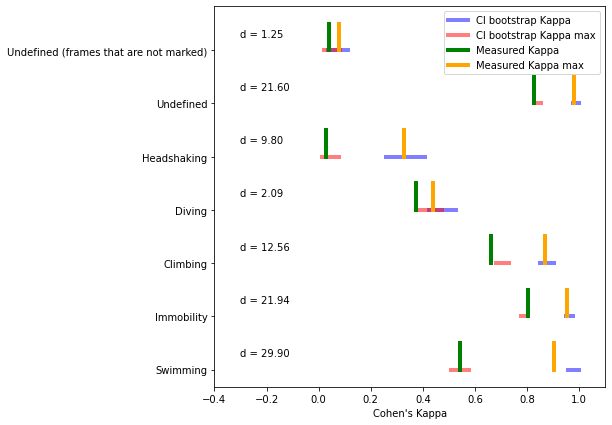

In [29]:
plt.rcParams["figure.figsize"] = (7,7)
y_pos = []
fig, ax = plt.subplots()
for i, cat in enumerate(data['ls_cat_txt'], 1):
    amax = get_descritor_catalogo(data, cat, 'kappa', False, True)
    ames = get_descritor_catalogo(data, cat, 'kappa', False, False)
    
    confidence = 0.95
    generate = cret_line(i)
    con_m   = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    con_max = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    
    
    d = es.get_d_cohen(amax, ames)
    text = ax.text(1, 1, "d = {:.2f}".format(d))
    text.set_position((-0.3, i + 0.25))
    
    y_pos.append(i)

    k = get_cate_medida(data, cat, False)['kappa']
    k_max = get_cate_medida(data, cat, True)['kappa']
    
    
    if(i==1):
        ax.plot(con_m, generate, label = "CI bootstrap Kappa", color= "blue", linewidth=4.0, alpha=0.5)
        ax.plot(con_max, generate, label = "CI bootstrap Kappa max", color ="red", linewidth=4.0, alpha=0.5)
        
        ax.plot([k, k], cre_generate(i), label = "Measured Kappa", color= "green", linewidth=4.0)
        ax.plot([k_max, k_max], cre_generate(i),label = "Measured Kappa max", color= "orange", linewidth=4.0)
        
    else:
        ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
        ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)
        
        ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
        ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)
        
    
    
        
ax.set_xlim([-0.4, 1.1])
ax.legend()
ax.set_yticks(y_pos)
ax.set_yticklabels(data['ls_cat_txt'])
ax.set_xlabel("Cohen's Kappa")
plt.show()

In [30]:
# get_lis_categoria(cat, 'vies', False, True)

In [31]:
# get_lis_categoria(cat, 'vies', False, False)

In [32]:
# plt.rcParams["figure.figsize"] = (7,7)
# y_pos = []
# fig, ax = plt.subplots()
# for i, cat in enumerate(data['ls_cat_txt'], 1):
#     amax = get_lis_categoria(cat, 'vies', False, True)
#     ames = get_lis_categoria(cat, 'vies', False, False)
    
#     confidence = 0.95
#     generate = cret_line(i)
#     con_m   = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
#     con_max = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    
    
#     d = es.get_d_cohen(amax, ames)
#     text = ax.text(1, 1, "d = {:.2f}".format(d))
#     text.set_position((-0.3, i + 0.25))
    
#     y_pos.append(i)

#     k = get_cate_medida(data, cat, False)['vies']
#     k_max = get_cate_medida(data, cat, True)['vies']
    
    
#     if(i==1):
#         ax.plot(con_m, generate, label = "CI bootstrap vies", color= "blue", linewidth=4.0, alpha=0.5)
#         ax.plot(con_max, generate, label = "CI bootstrap vies max", color ="red", linewidth=4.0, alpha=0.5)
        
#         ax.plot([k, k], cre_generate(i), label = "Measured vies", color= "green", linewidth=4.0)
#         ax.plot([k_max, k_max], cre_generate(i),label = "Measured vies max", color= "orange", linewidth=4.0)
        
#     else:
#         ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
#         ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)
        
#         ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
#         ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)
        
    
    
        
# ax.set_xlim([-0.4, 1.1])
# ax.legend()
# ax.set_yticks(y_pos)
# ax.set_yticklabels(data['ls_cat_txt'])
# ax.set_xlabel("Cohen's Kappa")